In [1]:
import pandas as pd
import numpy as np

Loading dataset in enviorment

In [2]:
train = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\train.csv")
test = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\test.csv")
submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")

In [3]:
#Saving id variables to create final submission
ids_test = test['User_ID'].copy()
product_ids_test = test['Product_ID'].copy()

In [4]:
print(train.shape)
print(test.shape)
print(submission.shape)

(550068, 12)
(233599, 11)
(233599, 3)


# Data Profiling

In [5]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [10]:
train["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [11]:
#train["Occupation"]= train["Occupation"].astype(str).str[0]
#train.head(1)

In [12]:
train["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
train["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [14]:
len(train["User_ID"])

550068

In [15]:
len(train["Product_ID"])

550068

In [16]:
len(train["Purchase"])

550068

In [17]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:

train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# Data Preprocessing

In [19]:
train['User_ID'] = train['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [132]:
train = train.fillna(0)
test = test.fillna(0)

In [21]:
#ValueError: could not convert string to float: 'P00069042' We write below code to handle this error

In [22]:
# Product_ID preprocess e.g. P00069042 -> 69042
train['Product_ID'] = train['Product_ID'].astype(str).str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].astype(str).str.replace('P00', '')

In [23]:


train_cat = train.select_dtypes(include = "object")
train_num = train.select_dtypes(exclude = "object" )

print("we have",train_cat.shape, "categorical variable")
print("we have",train_num.shape, "numerical variable")


test_cat = test.select_dtypes(include = "object")
test_num = test.select_dtypes(exclude = "object" )


print("we have",test_cat.shape, "categorical variable")
print("we have",test_num.shape, "numerical variable")


we have (550068, 5) categorical variable
we have (550068, 7) numerical variable
we have (233599, 5) categorical variable
we have (233599, 6) numerical variable


In [24]:

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in train_cat:
    train[x]=le.fit_transform(train[x].astype(str))

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,2734,1,6,16,2,4,0,8,0.0,0.0,7969


In [25]:
#LABEL ENCODING FOR TRAIN DATA

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in test_cat:
    test[x]=le.fit_transform(test[x].astype(str))

test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,1144,1,4,7,1,2,1,1,11.0,0.0
1,8,994,1,2,17,2,0,0,3,5.0,0.0
2,9,2672,0,3,1,1,4,1,5,14.0,0.0
3,9,1299,0,3,1,1,4,1,4,9.0,0.0
4,10,519,0,2,1,2,1,0,4,5.0,12.0


In [26]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [27]:
#Pr = train[["Product_Category_2","Product_Category_3"]]
#Pr.isnull().sum()

In [28]:
#train.isnull().sum()

In [29]:
#for x in Pr:
    #train[x].fillna(train[x].mean(),inplace = True)

In [30]:
#train.isnull().sum()

In [31]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [32]:
#for x in Pr_test:
    #test[x].fillna(test[x].mean(),inplace = True)

In [33]:
#test.isnull().sum()

In [34]:
train["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [35]:
#data_copy = pd.concat((train,test),sort = False).reset_index(drop = True)

#data_copy.drop(["Purchase"],axis = True,inplace = True)

#print("size of :",data_copy.shape)


In [36]:
X = train.drop(["Purchase"],axis =1)
y= train[["Purchase"]]
X_test = test.to_numpy()

In [37]:
#figure = data_copy.boxplot(column="Product_Category_1")

In [38]:
#

In [39]:
#lower_Bridge = data_copy["Product_Category_1"].quantile(0.25)-(IQR*1.5)
#upper_Bridge = data_copy["Product_Category_1"].quantile(0.75)+(IQR*1.5)
#print(lower_Bridge),print(upper_Bridge)

In [40]:
#data_copy.loc[data_copy['Product_Category_1']>=18.5,'Age']=18.5

In [41]:
#figure = data_copy.boxplot(column="Product_Category_1")

In [42]:
#X = data_copy.drop('Purchase',axis = 1).values

In [43]:
X.shape

(550068, 11)

In [44]:
#X = data_copy.drop('User_ID',axis = 1)

In [45]:
#X = data_copy.drop('Product_Category_1',axis = 1)

In [46]:
#X = data_copy.drop('Product_Category_2',axis = 1)

In [47]:
#X = data_copy.drop('Product_Category_3',axis = 1)

In [48]:
#y = data_copy["Purchase"].values

In [49]:
y.shape

(550068, 1)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X =scaler.transform(X)
print(X)

[[-1.74966103 -1.02299262 -1.74651251 ... -0.61080871 -1.08365403
  -0.61464112]
 [-1.74966103  0.66046883 -1.74651251 ... -1.11891197 -0.11832323
   1.62510562]
 [-1.74966103 -0.84516218 -1.74651251 ...  1.67565594 -1.08365403
  -0.61464112]
 ...
 [ 1.74267352  1.83810149 -1.74651251 ...  3.70806897 -1.08365403
  -0.61464112]
 [ 1.74386018  1.83810149 -1.74651251 ...  3.70806897 -1.08365403
  -0.61464112]
 [ 1.74445351  1.8361256  -1.74651251 ...  3.70806897 -1.08365403
  -0.61464112]]


In [51]:
#converting y variable in categorical data(in this case we have already convert y in categgorical data)
y = y.astype(int)
y

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969
...,...
550063,368
550064,371
550065,137
550066,365


In [52]:
Xdata = pd.DataFrame(X)
Xdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split


#split the data into tesst and train

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.3,random_state =10 )

# we have follow this syntax alll over the project.Random_state used beacause generate same output
# bydefault sklearn has it own splitting ratio as 75% to 25%


In [54]:
# Create and train the Linear Regression  Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)
y_pred

array([[8520.28167148],
       [8433.76577406],
       [7787.48801463],
       ...,
       [8351.20158587],
       [8299.48314693],
       [8737.1027756 ]])

In [55]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE: 3524.196994820048
MSE: 21289204.70618079
RMSE: 4614.022616565809


In [56]:
metrics.r2_score(y_val, y_pred)

0.1557813845873096

In [57]:
#import statsmodels.api as sm
#regressor_OLS = sm.OLS(endog = y, exog = X).fit() 
#regressor_OLS.summary()

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [59]:
# Validating the model

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print(xgb_reg, rmse)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1.0, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None) 2587.626366319388


In [60]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE: 1918.461159435561
MSE: 6695810.21167128
RMSE: 2587.626366319388


In [61]:
metrics.r2_score(y_val, y_pred)

0.734479154859075

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
from sklearn.ensemble import RandomForestClassifier 
#Create classifier 
rf_classifier = RandomForestClassifier(n_jobs=-1)

In [64]:
# set different parameter values to tune
param_grid = {
    "n_estimators": [100,200,300,400],
    "max_depth": [1,3,7,9],
    "criterion": ["gini","Entropy"]
}

In [65]:
# set gridsearch
model = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,n_iter=5, cv=5, verbose=2, n_jobs=1,random_state=42)

In [66]:
# set gridsearch
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=1)
print(model)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [67]:
#train the model with gridserchCV 
#model.fit(x_train,y_train)

In [68]:
len(y_pred)

165021

In [69]:
#submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")
#submission['User_ID'] = test['User_ID']
#submission['Product_ID'] = test['Product_ID']
#submission.head()

In [70]:
len(submission["User_ID"])

233599

In [71]:
len(submission["Product_ID"])

233599

In [72]:
len(X_test)

233599

In [73]:
# Training using entire data to improve accuracy

xgb_reg.fit(X, y)
predict = xgb_reg.predict(X_test)

#submission.Purchase= predict
#submission.to_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv",index= True)
#Public LB Score: 2574.95

In [74]:
len(predict)

233599

In [75]:
#predict[predict<0]=25

In [76]:
submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
#submission.head()

In [77]:
submission['Purchase'] = predict

In [78]:
submission[["User_ID","Product_ID","Purchase"]]

,User_ID,Product_ID,Purchase
0,3,1144,21203.597656
1,8,994,14924.152344
2,9,2672,-763.370972
3,9,1299,-763.370972
4,10,519,-2256.995850
...,...,...,...
233594,5886,1049,4197.239258
233595,5886,2345,1962.134155
233596,5886,303,19304.708984
233597,5887,1105,-981.401367


In [79]:
submission.to_csv('sample_submission_V9Inaty_xgb.csv', index=False)

In [80]:
len(predict)

233599

#Note ----ValueError: array length 235101 does not match index length 233599
    
    this error due to incorrect spliting of data.
    I resolve by splititing train data into x and y and keep test data as it.
    One more step i did here i converted test data to numpy array with test.numpy()

Rondom Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
#Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [82]:
#model = RandomForestClassifier()

# Fit on training data
model.fit(x_train,y_train)

C:\Users\akshay.vilayatkar.vc\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
y_pred_RFR= xgb_reg.predict(x_val)

In [84]:
rmse = np.sqrt(mean_squared_error(y_pred_RFR, y_val))

In [85]:
print(model, rmse)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 2489.0210750226356


In [86]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_RFR))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RFR)))

MAE: 1848.758106746793
MSE: 6195225.911906837
RMSE: 2489.0210750226356


In [87]:
metrics.r2_score(y_val, y_pred_RFR)

0.7543297124668835

# RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
#Create the model with 100 trees
model = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
#model = RandomForestClassifier()

# Fit on training data
model.fit(X,y)

C:\Users\akshay.vilayatkar.vc\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
Rond_predict = model.predict(X_test)

In [90]:
len(Rond_predict)

233599

In [91]:
submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']

In [92]:
submission['Purchase'] = Rond_predict

In [93]:
submission[["User_ID","Product_ID","Purchase"]]

,User_ID,Product_ID,Purchase
0,3,1144,9648.65
1,8,994,9353.68
2,9,2672,8872.11
3,9,1299,8872.11
4,10,519,11038.45
...,...,...,...
233594,5886,1049,7481.47
233595,5886,2345,8691.84
233596,5886,303,8688.97
233597,5887,1105,9239.16


In [94]:
submission.to_csv("sample_submission_V9Inaty_Rondom.csv'",index= False)

In [95]:
# Submission file
submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': Rond_predict})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

In [96]:
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

In [97]:
submit.to_csv("final_solution_rondom_forest.csv", index=False)

In [98]:
#import statsmodels.api as sm
#regressor_OLS = sm.OLS(endog = y, exog = X).fit() 
#regressor_OLS.summary()

# GradientBoostingRegressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
GBR = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
GBR.fit(x_train, y_train)

C:\Users\akshay.vilayatkar.vc\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
y_pred_GBR = GBR.predict(x_val)

In [102]:
len(y_pred_GBR)

165021

In [103]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_GBR))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_GBR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_GBR)))

MAE: 2105.182281322524
MSE: 7809262.998170733
RMSE: 2794.5058593910185


In [104]:
metrics.r2_score(y_val,y_pred_GBR)

0.6903254355107394

# Decision Tree classifier

In [105]:
from sklearn.linear_model import Ridge

In [106]:
rr = Ridge(alpha=0.01) 

In [107]:
rr.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
y_pred_Ridge= rr.predict(x_val)

In [109]:
len(y_pred_Ridge)

165021

In [110]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_Ridge))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_Ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_Ridge)))

MAE: 3524.1969988718174
MSE: 21289204.705719706
RMSE: 4614.022616515843


In [111]:
metrics.r2_score(y_val, y_pred_Ridge)

0.15578138460559376

In [112]:
# Fitting Polynomial Regression to the dataset#
#from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree=4)
#X_poly_train = poly_reg.fit_transform(x_train)
#pol_reg = LinearRegression()
#pol_reg.fit(X_poly, y_train)


In [113]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
sns.countplot(x=train['Age'],saturation=0.75)

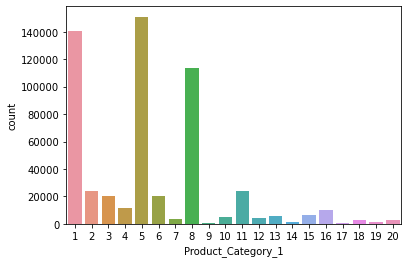

In [114]:
sns.countplot(x=train["Product_Category_1"],saturation = 0.75)

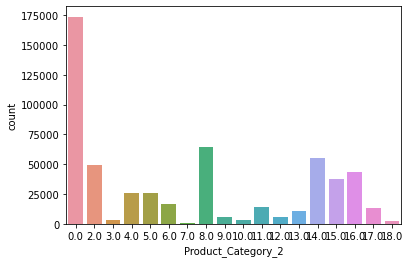

In [115]:
sns.countplot(x=train["Product_Category_2"],saturation = 0.75)

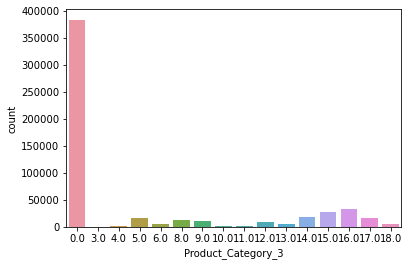

In [116]:
sns.countplot(x=train["Product_Category_3"],saturation = 0.75)

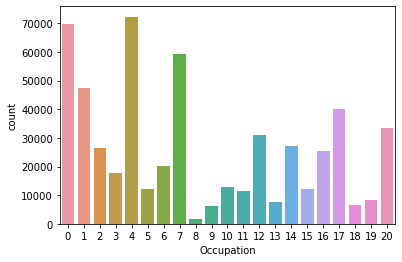

In [117]:
sns.countplot(x = train["Occupation"],saturation=0.75)

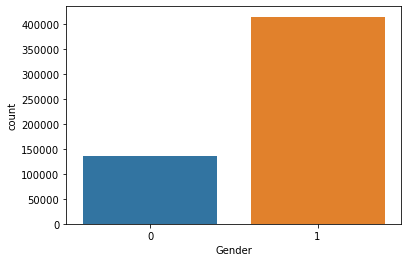

In [118]:
sns.countplot(x= train["Gender"],saturation =0.75)

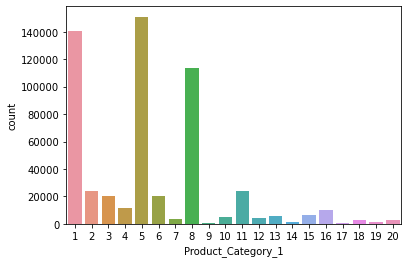

In [119]:
sns.countplot(x= train["Product_Category_1"])

In [120]:
train["Product_Category_1"].describe()


count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [121]:
IQR = train.Product_Category_1.quantile(0.75)-train.Product_Category_1.quantile(0.25)

In [122]:
upper_Bridge = train["Product_Category_1"].quantile(0.75) + (IQR*1.5)

In [123]:
#To get extreame outlier

Elower = train["Product_Category_1"].quantile(0.25)-(IQR*3) 
Eupper = train["Product_Category_1"].quantile(0.75)+(IQR*3) 
print(Elower),print(Eupper)


-20.0
29.0


(None, None)

In [124]:
train.loc[train['Product_Category_1']>= 18.5,'Product_Category_1']=18.5

In [125]:
train.loc[train["Product_Category_1"]>=18.5,"Age"]=18.5

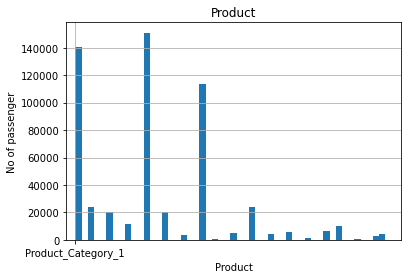

In [126]:
figure=train.Product_Category_1.hist(bins=50)
figure.set_title('Product')
figure.set_xlabel('Product')
figure.set_ylabel('No of passenger')
figure = train.boxplot(column="Product_Category_1")

In [127]:
#Looking at distributionx

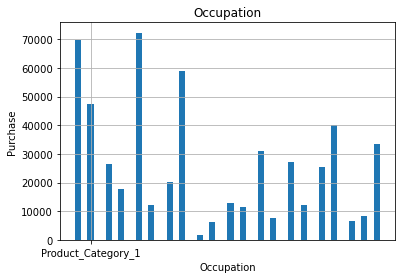

In [128]:
figure=train.Occupation.hist(bins=50)
figure.set_title('Occupation')
figure.set_xlabel('Occupation') 
figure.set_ylabel('Purchase')

figure =train.boxplot(column = "Product_Category_1")

#import scipy.stats as stat import pylab


In [129]:
def plot_data(train,feature):
    plt.figure(figsize=(10,6)) 
    plt.subplot(1,2,1) 
    train[feature].hist() 
    plt.subplot(1,2,2) 
    stat.probplot(train[feature],dist='norm',plot=pylab)
    plt.show()

In [100]:
#3800.00+1025.00+7906.00+1086.00+679.00+1333.00+2478.00+3068.00+8496.00
